In [1]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 19 not upgraded.
Need to get 2,434 kB of archives.
After this operation, 7,681 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2.1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2.1 [2,038 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgail18 amd64 2.24.33-2ubuntu2.1 [15.9 kB]
Get:4 http://archive.ubun

In [22]:
import networkx as nx
import matplotlib.pyplot as plt
from queue import PriorityQueue

# Define graph structure
teyvat = {
    'Mondstadt': ['Liyue', 'Fontaine'],
    'Liyue': ['Mondstadt', 'Inazuma', 'Sumeru', 'Fontaine'],
    'Inazuma': ['Liyue', 'Sumeru'],
    'Sumeru': ['Liyue', 'Inazuma', 'Natlan', 'Fontaine'],
    'Fontaine': ['Mondstadt', 'Liyue', 'Sumeru', 'Snezhnaya'],
    'Natlan': ['Sumeru', 'Snezhnaya'],
    'Snezhnaya': ['Fontaine', 'Natlan']
}

# Define weights for edges (approximate travel difficulty/distance)
weight = {
    'MondstadtLiyue': 4, 'MondstadtFontaine': 6, 'LiyueMondstadt': 4, 'LiyueInazuma': 7, 'LiyueSumeru': 5, 'LiyueFontaine': 3,
    'InazumaLiyue': 7, 'InazumaSumeru': 6, 'SumeruLiyue': 5, 'SumeruInazuma': 6, 'SumeruNatlan': 4, 'SumeruFontaine': 5,
    'FontaineMondstadt': 6, 'FontaineLiyue': 3, 'FontaineSumeru': 5, 'FontaineSnezhnaya': 8,
    'NatlanSumeru': 4, 'NatlanSnezhnaya': 5, 'SnezhnayaFontaine': 8, 'SnezhnayaNatlan': 5
}

# Define heuristic values (hypothetical values, e.g., distance to Snezhnaya)
heuristic = {
    'Mondstadt': 10, 'Liyue': 8, 'Inazuma': 9, 'Sumeru': 6, 'Fontaine': 7, 'Natlan': 5, 'Snezhnaya': 0,
}


def draw_graph():
    """ Draws the graph with edge weights and heuristic values. """
    G = nx.Graph()

    # Add edges with weights
    for node, neighbors in teyvat.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor, weight=weight.get(node + neighbor, weight.get(neighbor + node, 0)))

    # Graph layout
    pos = nx.spring_layout(G)

    # Draw the graph
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightgreen',
            font_size=10, font_color='black', font_weight='bold', edge_color='gray')

    # Add edge labels (weights)
    edge_labels = {(node, neighbor): weight.get(node + neighbor, weight.get(neighbor + node, 0))
                   for node, neighbors in teyvat.items() for neighbor in neighbors}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='red')

    # Add heuristic values as labels on nodes
    heuristic_labels = {node: f"\n (h={heuristic[node]})" for node in teyvat.keys()}
    nx.draw_networkx_labels(G, pos, labels=heuristic_labels, font_size=10, font_color='blue')

    plt.show()



In [23]:
def main():
    draw_graph()

def a_star(graph, start, goal):
    #Implements the A* algorithm.
    queue = PriorityQueue()
    queue.put((0, start))
    visited = {start: None}
    cost_so_far = {start: 0}

    while not queue.empty():
        current_priority, current = queue.get()

        if current == goal:
            break

        for neighbor in graph[current]:
            edge_weight = weight.get(current + neighbor, weight.get(neighbor + current, float('inf')))
            new_cost = cost_so_far[current] + edge_weight

            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                priority = new_cost + heuristic[neighbor]
                queue.put((priority, neighbor))
                visited[neighbor] = current

    return visited, cost_so_far.get(goal, float('inf'))

def reconstruct_path(visited, start, goal):
    #Reconstructs the path from start to goal.
    path = []
    current = goal

    while current and current != start:
        path.append(current)
        current = visited.get(current)

    if current == start:
        path.append(start)
        path.reverse()
        return path
    else:
        return None



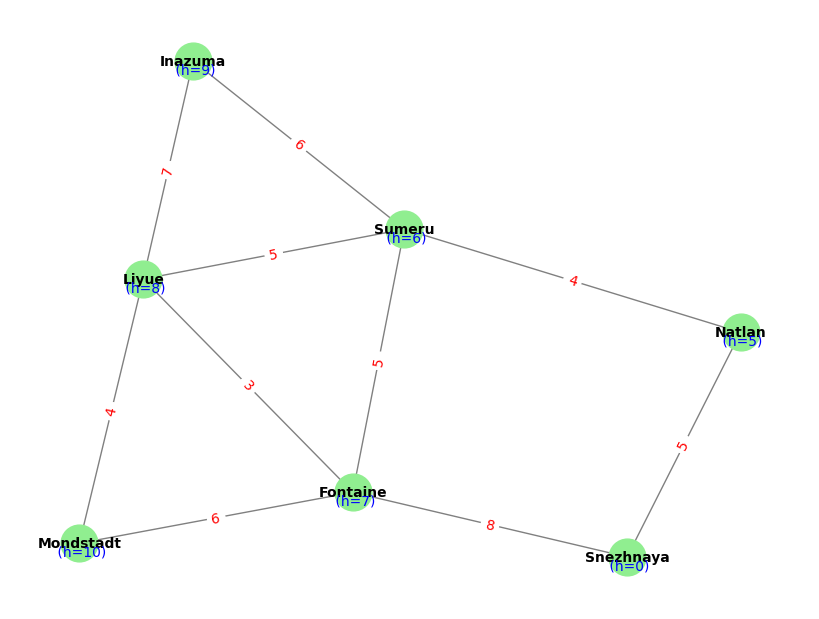

In [26]:
main()

In [33]:
def search():

  visited, cost = a_star(teyvat, 'Mondstadt', 'Fontaine')
  path = reconstruct_path(visited, 'Mondstadt', 'Fontaine')

  if path:
      print(f"Path for A* is: {path} with a cost of {cost}")
  else:
      print("No valid path found.")

search()

Path for A* is: ['Mondstadt', 'Fontaine'] with a cost of 6
